<a href="https://colab.research.google.com/github/shivani-202/hate-speech-detection-and-classification-/blob/main/LDAimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing LDA Topic modeling.
Aim: Labeling the dataset
Procedure:
Generating topics and then ranking them.
Assigning the dominant ranks as topics and then labeling the document.

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/hatespeech_dataset.csv')
df.head()

,Unnamed: 0,label,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [17]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   label       56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


(None,
         Unnamed: 0         label
 count  56745.00000  56745.000000
 mean   28372.00000      0.402890
 std    16381.01485      0.490483
 min        0.00000      0.000000
 25%    14186.00000      0.000000
 50%    28372.00000      0.000000
 75%    42558.00000      1.000000
 max    56744.00000      1.000000)

In [18]:
df.isnull().sum()

,0
Unnamed: 0,0
label,0
tweet,0


No missing values.

<ipython-input-22-3b9bc4c99804>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Blues')


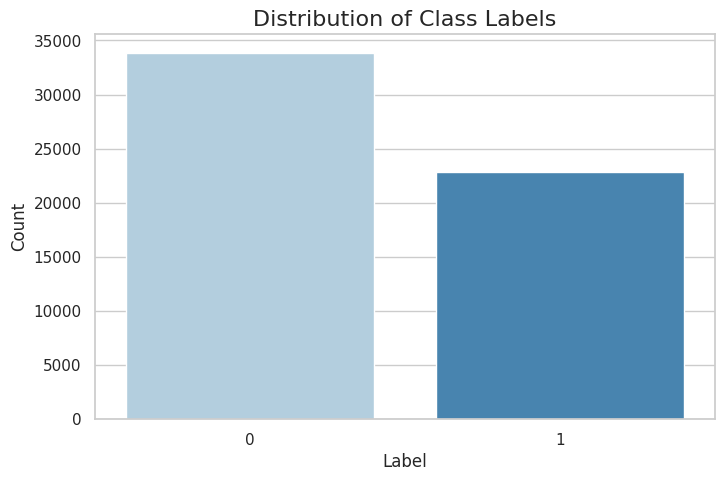

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the distribution of the 'class' label
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='Blues')

# Set plot labels and title
plt.title('Distribution of Class Labels', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  if isinstance(text, str):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove username
    text = re.sub(r'\@\w+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove emoji
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    return words
  else:
    return []

df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [24]:
df.head()

,Unnamed: 0,label,tweet,cleaned_tweet
0,0,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,1,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,2,0,bihday your majesty,"[bihday, majesty]"
3,3,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]"
4,4,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


Basic pre-processing steps were applied, tokens are created and then they are reduced to the base form.

In [30]:
# Generating bigrams and trigrams
df['bigrams_list'] = df['cleaned_tweet'].apply(lambda tokens: [' '.join(bigram) for bigram in nltk.bigrams(tokens)]) #Joining bigrams using space to create string tokens
print(df['bigrams_list'])

0        [father dysfunctional, dysfunctional selfish, ...
1        [thanks lyft, lyft credit, credit cant, cant u...
2                                         [bihday majesty]
3        [model love, love u, u take, take u, u time, t...
4                 [factsguide society, society motivation]
                               ...                        
56740    [yous muthafin, muthafin lie, lie right, right...
56741    [youve gone, gone broke, broke wrong, wrong he...
56742    [young buck, buck wan, wan na, na eat, eat dat...
56743    [youu got, got wild, wild bitch, bitch tellin,...
56744    [ruffled ntac, ntac eileen, eileen dahlia, dah...
Name: bigrams_list, Length: 56745, dtype: object


In [27]:
df['trigrams'] = df['cleaned_tweet'].apply(lambda tokens: list(nltk.trigrams(tokens)))
print(df['trigrams'])

0        [(father, dysfunctional, selfish), (dysfunctio...
1        [(thanks, lyft, credit), (lyft, credit, cant),...
2                                                       []
3        [(model, love, u), (love, u, take), (u, take, ...
4                      [(factsguide, society, motivation)]
                               ...                        
56740    [(yous, muthafin, lie), (muthafin, lie, right)...
56741    [(youve, gone, broke), (gone, broke, wrong), (...
56742    [(young, buck, wan), (buck, wan, na), (wan, na...
56743    [(youu, got, wild), (got, wild, bitch), (wild,...
56744    [(ruffled, ntac, eileen), (ntac, eileen, dahli...
Name: trigrams, Length: 56745, dtype: object


In [28]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
import optuna
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Prepare dictionary and corpus
dictionary_bigrams = Dictionary(df['bigrams_list'])
corpus_bigram = [dictionary_bigrams.doc2bow(text) for text in df['bigrams_list']]

# Define objective function for Optuna
def objective(trial):
    # Hyperparameter suggestions
    num_topics = trial.suggest_int("num_topics", 2, 30)  # Vary topic count from 2 to 20
    alpha = trial.suggest_float("alpha", 0.01, 0.5, log=True)
    eta = trial.suggest_float("eta", 0.01, 0.5, log=True)

    # Train LDA model
    lda_model_bigrams = LdaModel(
        corpus=corpus_bigram,
        id2word=dictionary_bigrams,
        num_topics=num_topics,
        random_state=42,
        passes=50,
        alpha=alpha,
        eta=eta,
        chunksize=2000,
        iterations=200
    )

    # Coherence score
    coherence_model_bigrams = CoherenceModel(
        model=lda_model_bigrams,
        texts=df['bigrams_list'],
        dictionary=dictionary_bigrams,
        coherence='c_v'
    )
    coherence_score = coherence_model_bigrams.get_coherence()

    return coherence_score

# Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


print("Best Coherence Score:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2024-11-06 08:56:45,405] A new study created in memory with name: no-name-b35bfb01-ffa6-4b42-8b7d-7fc539c63412
